### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("vehicle.csv").dropna()

In [4]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [6]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
df.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            205          205                   205           205   
car            413          413                   413           413   
van            195          195                   195           195   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     205                      205            205   
car                     413                      413            413   
van                     195                      195            195   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              205                     205                        205   
car              413                     413                        413   
van              195                     195                        195   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                205                205                        205   
car                413                413                        413   
van                195                195                        195   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            205             205               205   
car                            413             413               413   
van                            195             195               195   

       skewness_about.2  hollows_ratio  
class                                   
bus                 205            205  
car                 413            413  
van                 195            195

In [8]:
x = df['class'].value_counts()
x

car    413
bus    205
van    195
Name: class, dtype: int64

In [9]:
x[0]/x[1], x[0]/x[2], x[1]/x[2]

(2, 2, 1)

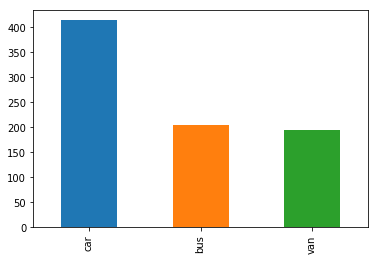

In [10]:
x.plot.bar()

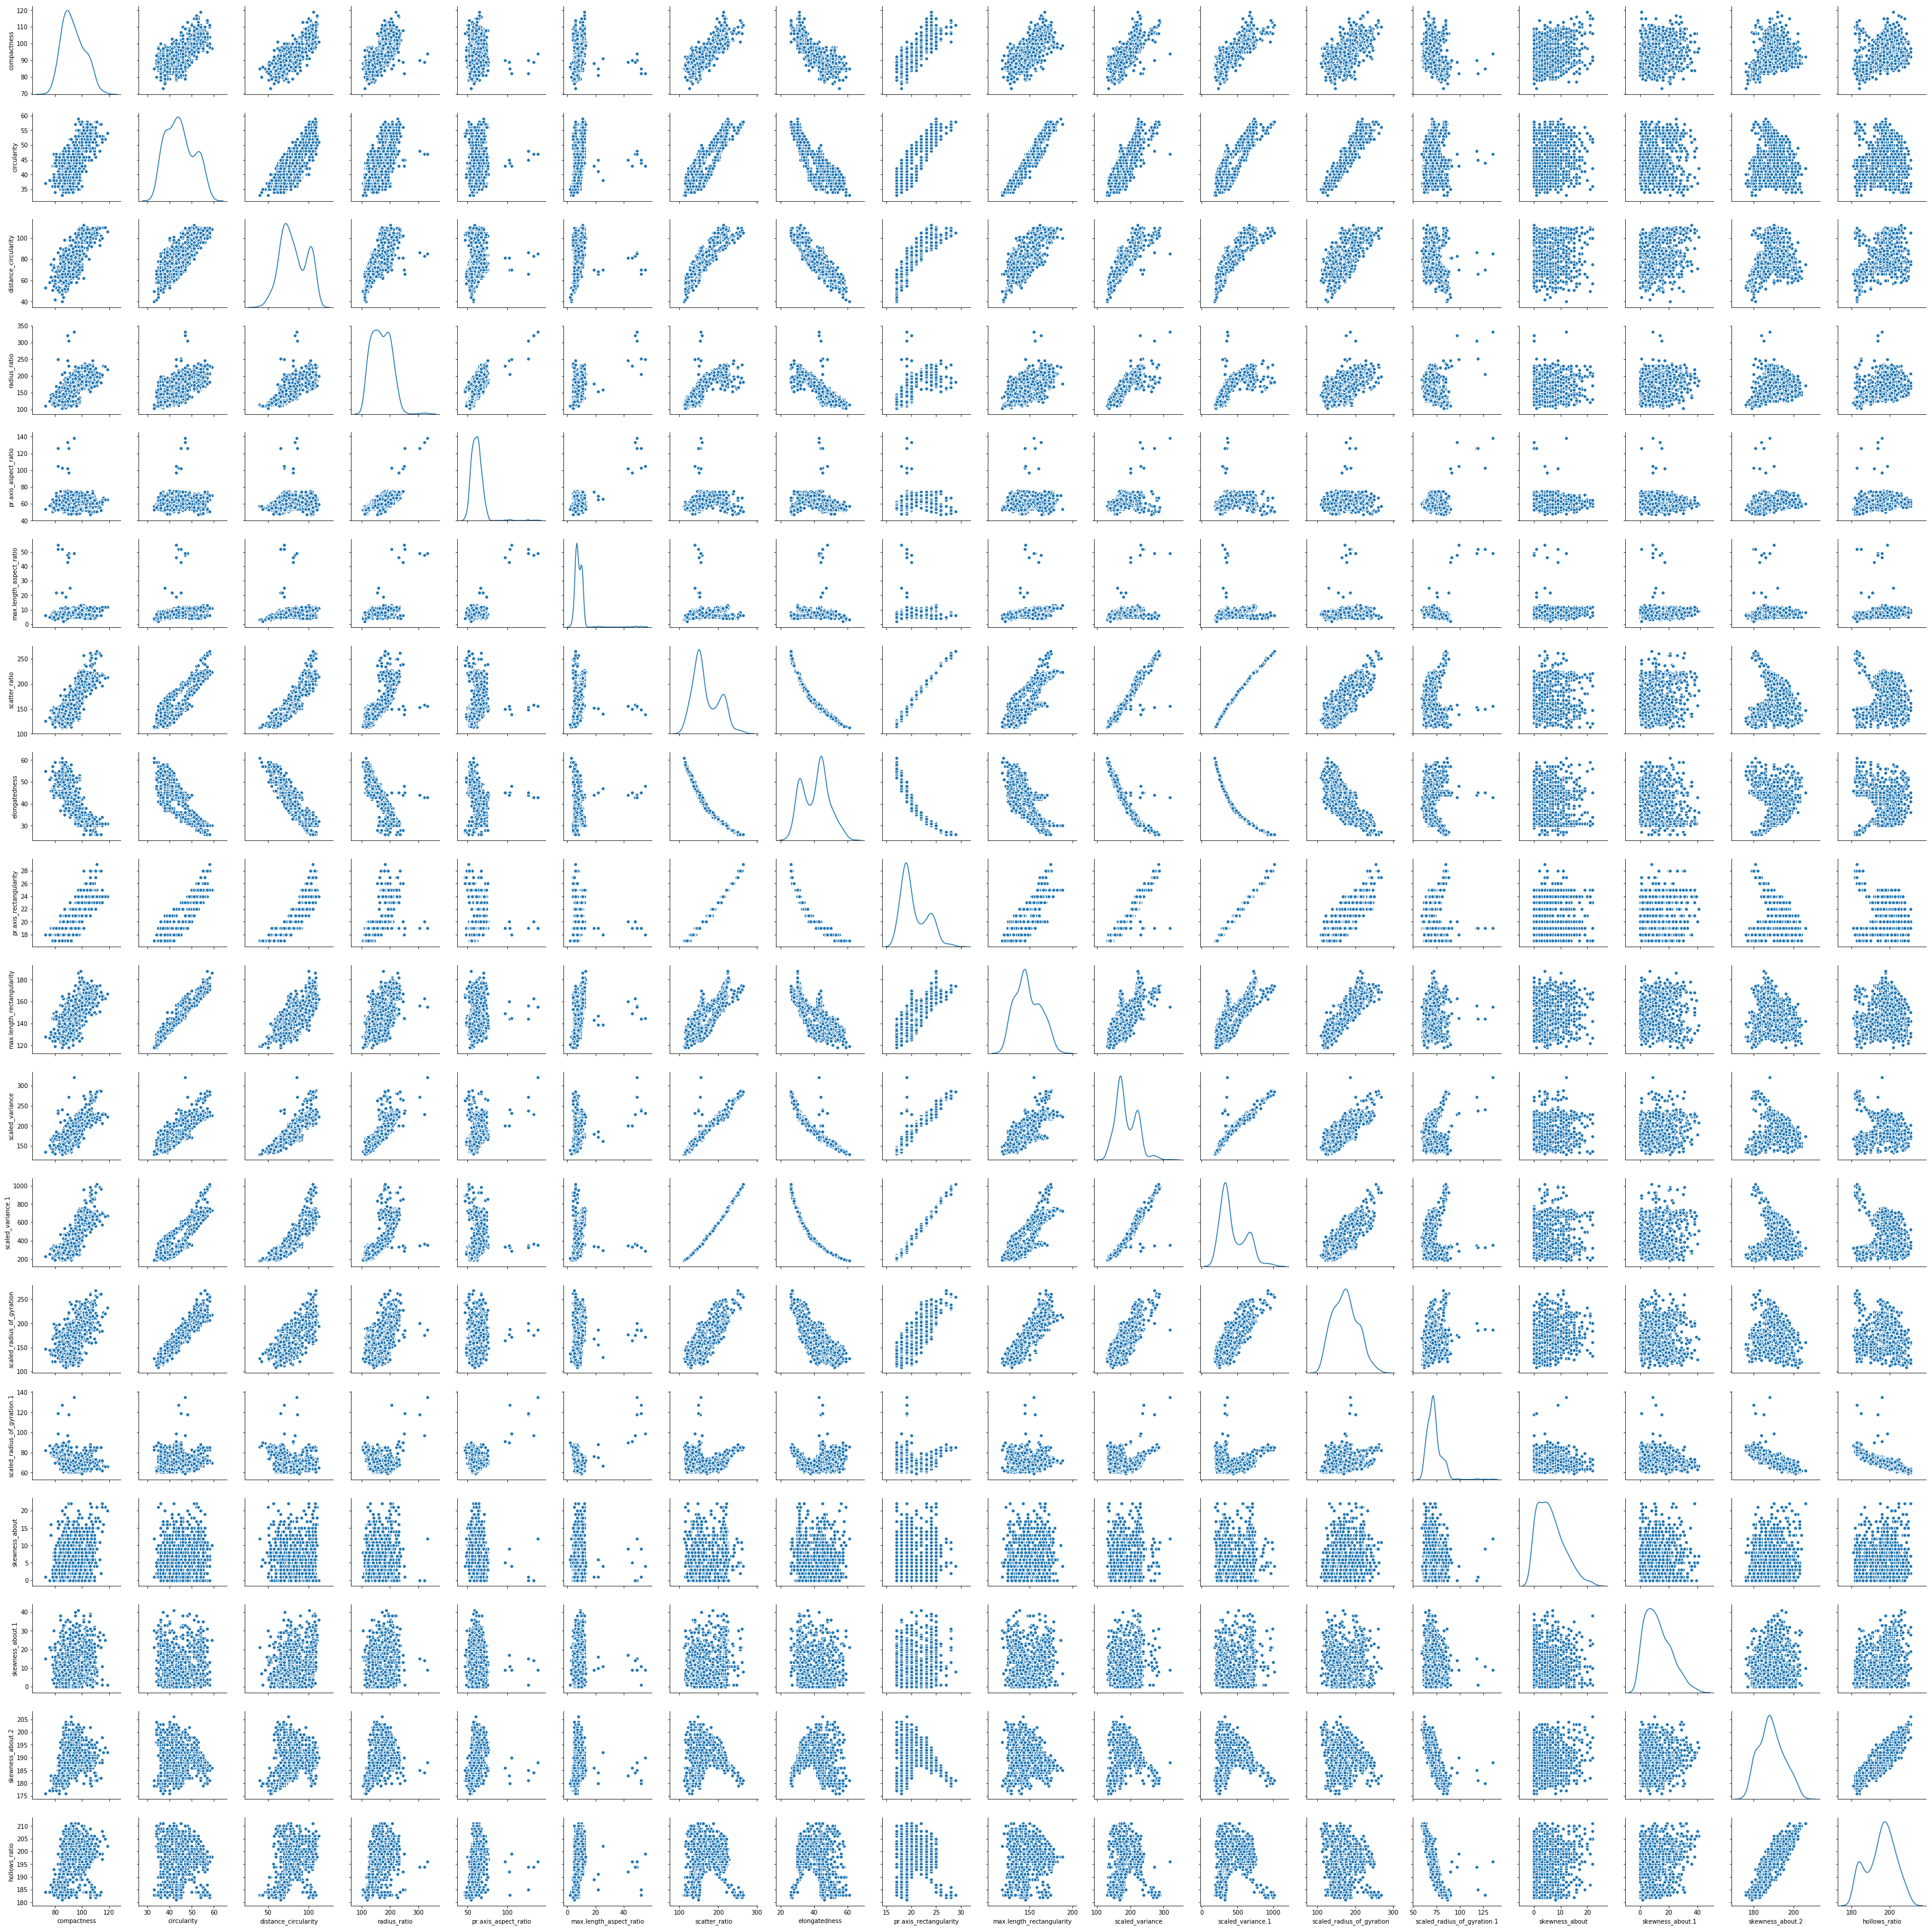

In [11]:
#importing seaborn for statistical plots
import seaborn as sns
sns.pairplot(df, diag_kind='kde')

### Check for any missing values in the data 

In [12]:
df.isnull().values.any()

False

In [13]:
#there are no missing values since its already removed.

### Remove the class variable and encode the values

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])
labels_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(labels_name_mapping)

{'bus': 0, 'van': 2, 'car': 1}


### 3. Standardize the data 

In [15]:
from scipy.stats import zscore

In [16]:
X = df.drop(['class'], axis=1)
y = df.pop('class')
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [17]:
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int64

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [18]:
df_z = X.apply(zscore)
df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [19]:
from sklearn.cluster import KMeans

You can later use this array to plot the elbow plot

In [20]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

cluster_errors  num_clusters
0    14634.000000             1
1     8623.136976             2
2     7037.287609             3
3     5741.253825             4
4     5320.563495             5
5     4707.810964             6
6     4430.763398             7
7     4130.485312             8
8     3913.996386             9

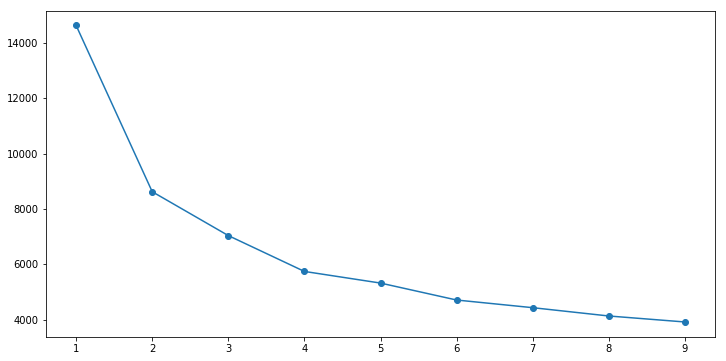

In [21]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### 5. Calculating distortion - C distance

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
distortions = []
sum_of_squares = []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    distortion = sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1))
    distortions.append(distortion)
    meanDistortions.append(distortion / df_z.shape[0])
    sum_of_squares.append(model.inertia_)

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

Text(0.5,1,u'Selecting k with the Elbow Method')

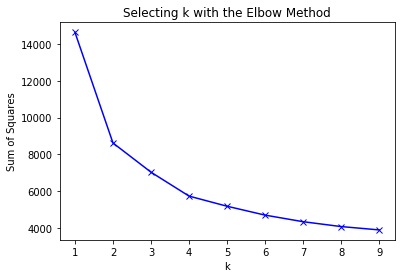

In [23]:

plt.plot(clusters, sum_of_squares, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squares')
plt.title('Selecting k with the Elbow Method')


Text(0.5,1,u'Selecting k with the Elbow Method')

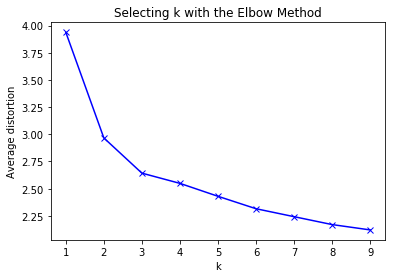

In [24]:

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [25]:
# Let us first start with K = 4
final_model=KMeans(3)
final_model.fit(df_z)
#prediction=final_model.predict(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
#df_z['class'] = y
#df_z['class_pred'] = prediction

In [27]:
df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

In [28]:
#Append the prediction 
#df[["class", "class_pred"]]

In [29]:
#df_z.boxplot(by = 'class_pred', layout=(10,2),figsize=(15, 100))

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

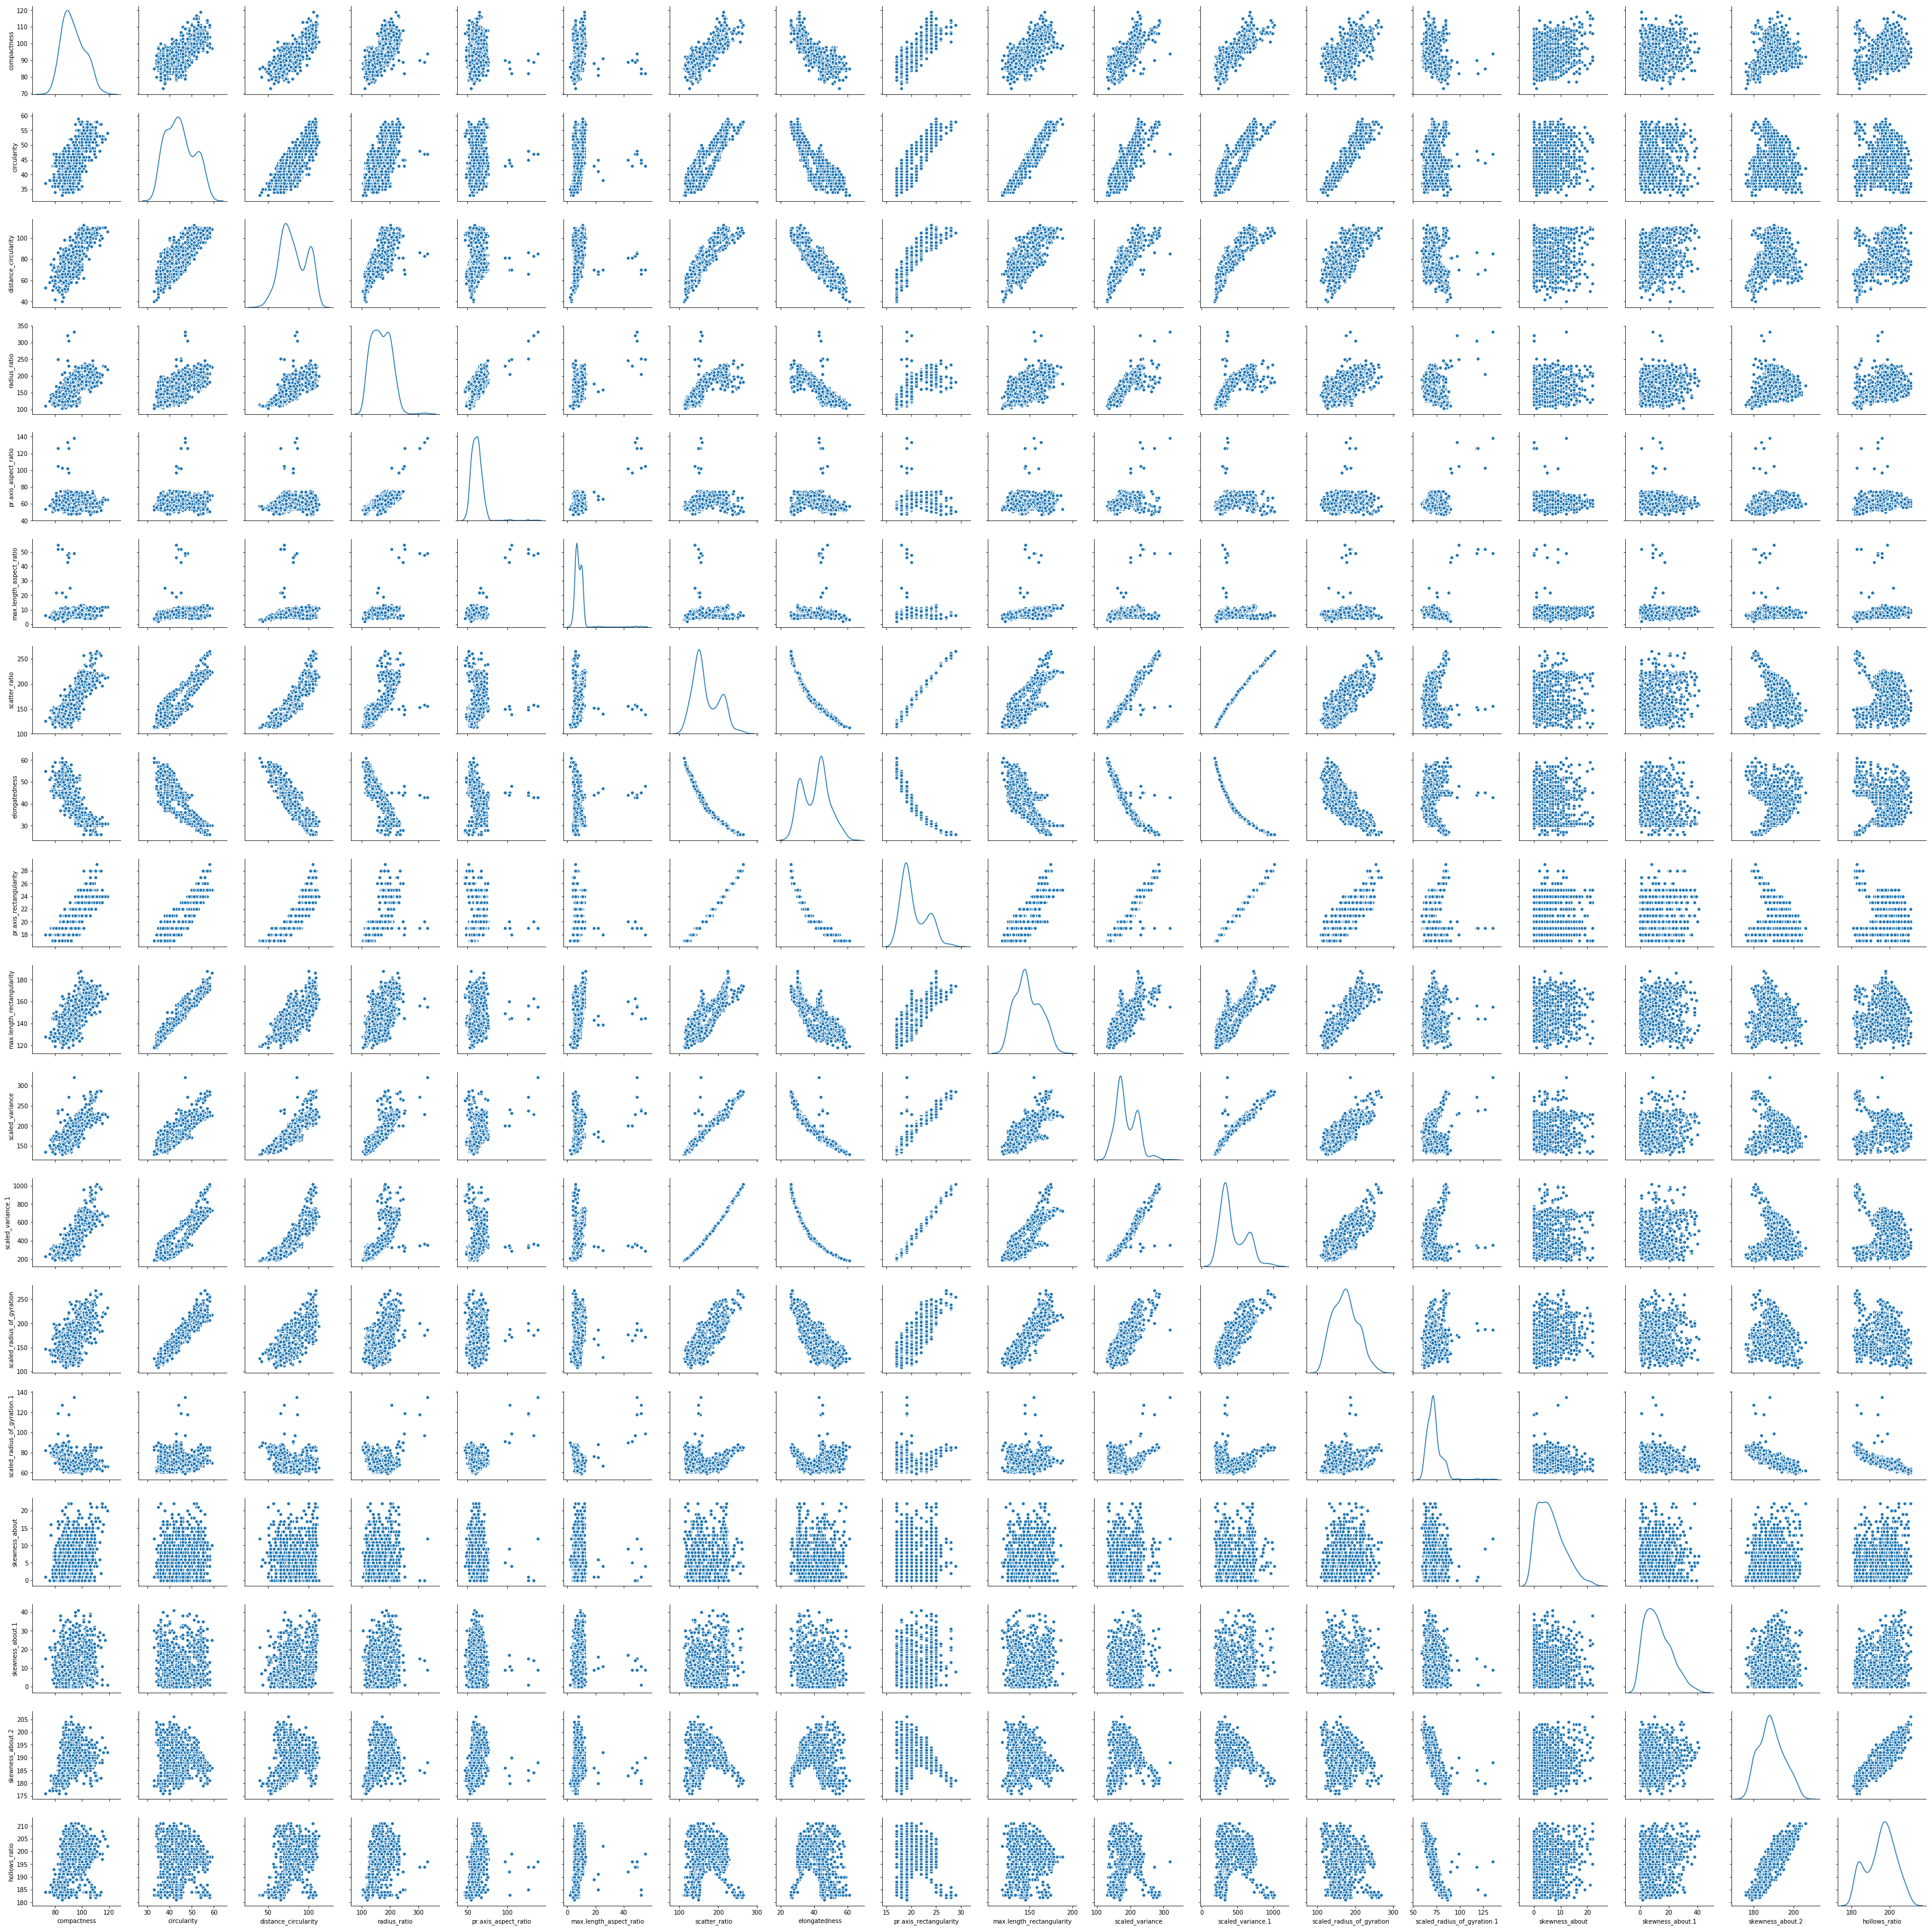

In [30]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [31]:
centroids = final_model.cluster_centers_

In [32]:
centroids.shape

(3, 18)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [33]:
df.columns.shape

(18,)

In [34]:
#df.columns[:-2]
centroid_df = pd.DataFrame(centroids, columns = list(df.columns))
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.233962    -0.573875             -0.307769     -0.030413   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.919871    -0.520093             -0.893208     -1.064356   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.205073                -0.116532      -0.459042   
1              0.215052                 0.342508       1.271805   
2             -0.500422                -0.219074      -0.779121   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.325063               -0.487988                  -0.536044   
1      -1.190612                1.275484                   1.092668   
2       0.865893               -0.745356                  -0.484632   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.413809          -0.463663                  -0.601550   
1         1.220381           1.281327                   1.079542   
2        -0.782403          -0.783411                  -0.384982   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.619241       -0.061780          0.010668   
1                    -0.028795        0.162290          0.265665   
2                     0.838787       -0.095243         -0.301716   

   skewness_about.2  hollows_ratio  
0          0.812786       0.698973  
1         -0.005356       0.183801  
2         -1.054206      -1.110695

Hint: Use pd.Dataframe function 

In [35]:
prediction=final_model.predict(df_z)
df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

### Use kmeans.labels_ function to print out the labels of the classes

In [36]:
final_model.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [39]:
import numpy as np

In [46]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [54]:
a.shape, b.shape, c.shape

((100, 2), (50, 2), (100, 2))

In [57]:
a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)
c_df = pd.DataFrame(c)

In [114]:
hc_df = np.concatenate([a_df, b_df, c_df], axis=0)
hc_df.shape

(250, 2)

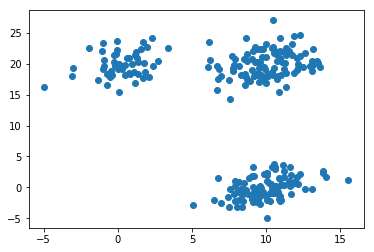

In [115]:
plt.scatter(hc_df[:,0], hc_df[:,1])

### 10. Use scatter matrix to print all the 3 distributions

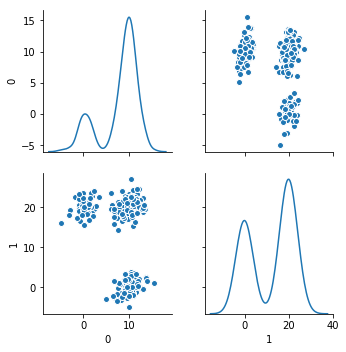

In [111]:
sns.pairplot(hc_df, diag_kind="kde")

### 11. Find out the linkage matrix

In [73]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [67]:
Z = linkage(hc_df, method='ward', metric='euclidean')
Z

array([[  3.40000000e+01,   4.70000000e+01,   5.17238082e-02,
          2.00000000e+00],
       [  1.90000000e+01,   4.10000000e+01,   5.19701804e-02,
          2.00000000e+00],
       [  1.00000000e+00,   2.90000000e+01,   5.45963970e-02,
          2.00000000e+00],
       [  9.10000000e+01,   9.70000000e+01,   6.38270336e-02,
          2.00000000e+00],
       [  1.70000000e+02,   1.86000000e+02,   8.15227137e-02,
          2.00000000e+00],
       [  2.00000000e+00,   1.30000000e+01,   9.54378804e-02,
          2.00000000e+00],
       [  5.40000000e+01,   7.00000000e+01,   1.05494737e-01,
          2.00000000e+00],
       [  7.90000000e+01,   8.10000000e+01,   1.13246362e-01,
          2.00000000e+00],
       [  1.65000000e+02,   2.40000000e+02,   1.13340877e-01,
          2.00000000e+00],
       [  5.00000000e+00,   9.30000000e+01,   1.15001878e-01,
          2.00000000e+00],
       [  2.50000000e+01,   2.80000000e+01,   1.18603577e-01,
          2.00000000e+00],
       [  1.56000000e

In [74]:
c, coph_dists = cophenet(Z , pdist(hc_df))
c

0.95790793180790224

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

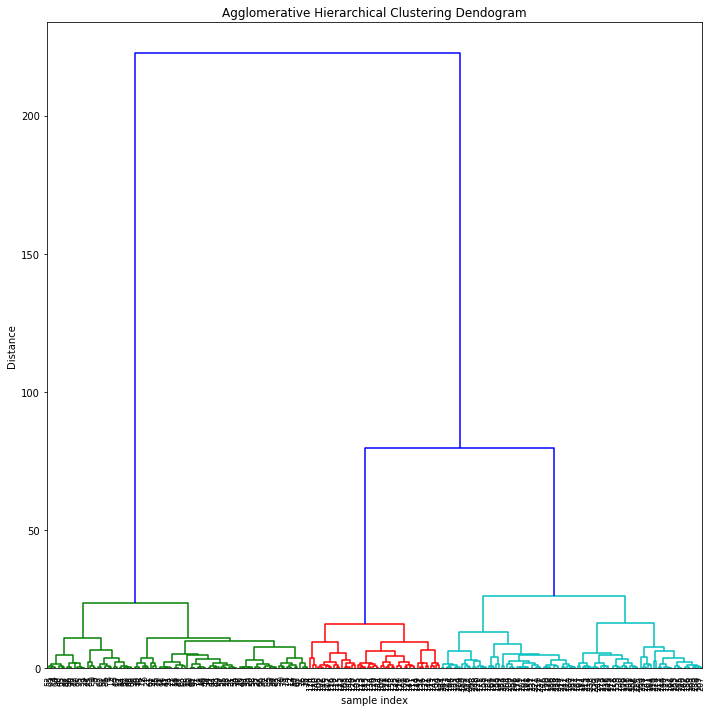

In [68]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

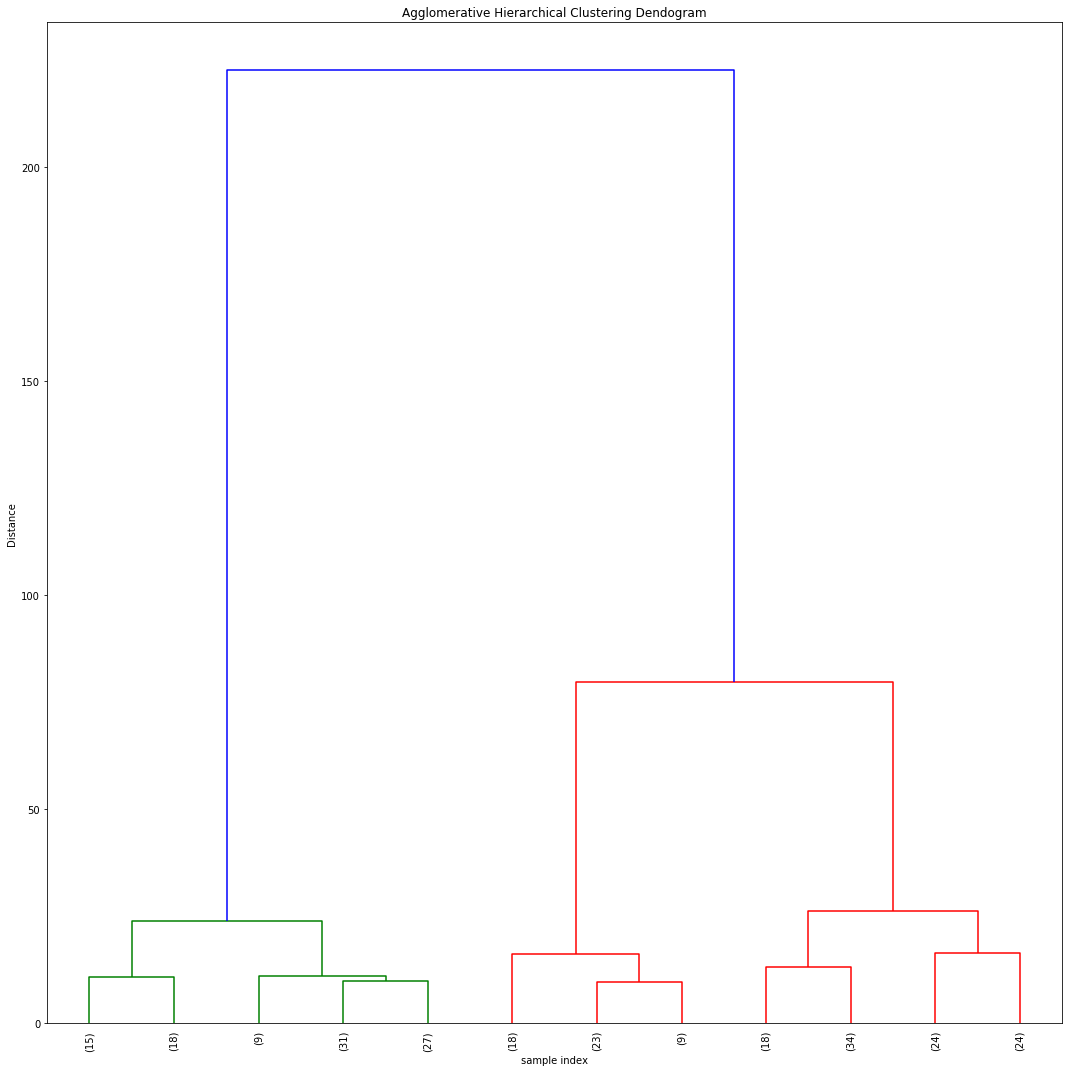

In [70]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10., truncate_mode='lastp', p=12)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

# The 50 is the optimal distance value from where we need to cut the dendrogram to get the cluster number as 3.

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

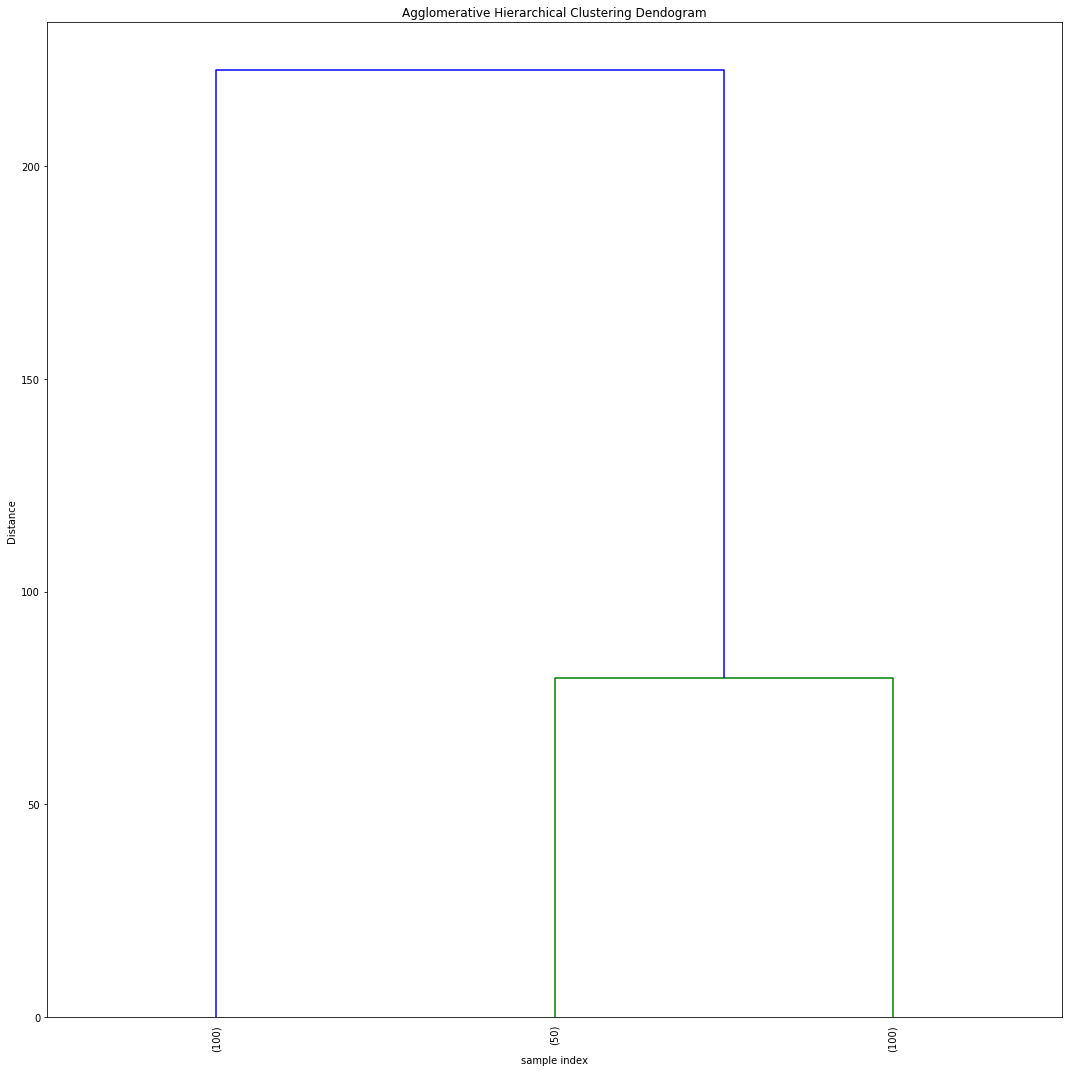

In [98]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10., truncate_mode='lastp', p=3)
plt.tight_layout()

In [95]:
from scipy.cluster.hierarchy import fcluster, ward

In [106]:
Z = ward(pdist(hc_df))
cluster = fcluster(Z, 50, criterion='distance')
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

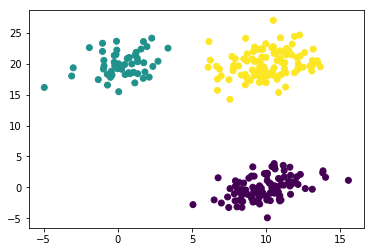

In [116]:
plt.scatter(hc_df[:,0], hc_df[:,1], c=cluster)
plt.show()